<a href="https://colab.research.google.com/github/chayhuixiang/tensorflow-starter/blob/main/7%20-%20Recurrent%20Neural%20Networks%20-%20RNNs/2_RNN_on_a_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Data

In [ ]:
x = np.linspace(0,50,501)

In [ ]:
y = np.sin(x)

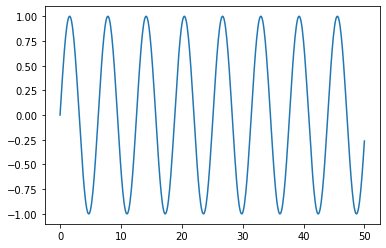

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
# Test Training split
test_percent = 0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_ind = int(len(df) - test_point)
test_ind

451

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [ ]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


# Batch Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [ ]:
length = 50 # length of data that we gonna put into the RNN to let the RNN learn (for cyclical data length should encompass the entire cycle)
batch_size = 1 # just keep this

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [ ]:
len(scaled_train)

451

In [ ]:
# The generator creates 401 sets of data with length of 50
len(generator)

401

In [ ]:
X,y = generator[0]

In [ ]:
print(X,y) # X contains the input training data, y contains the point we want to predict

[[[4.99999116e-01]
  [5.49916225e-01]
  [5.99334579e-01]
  [6.47760405e-01]
  [6.94709850e-01]
  [7.39713809e-01]
  [7.82322618e-01]
  [8.22110545e-01]
  [8.58680040e-01]
  [8.91665714e-01]
  [9.20737985e-01]
  [9.45606372e-01]
  [9.66022399e-01]
  [9.81782075e-01]
  [9.92727935e-01]
  [9.98750612e-01]
  [9.99789928e-01]
  [9.95835500e-01]
  [9.86926839e-01]
  [9.73152957e-01]
  [9.54651478e-01]
  [9.31607263e-01]
  [9.04250562e-01]
  [8.72854714e-01]
  [8.37733417e-01]
  [7.99237589e-01]
  [7.57751870e-01]
  [7.13690771e-01]
  [6.67494535e-01]
  [6.19624741e-01]
  [5.70559686e-01]
  [5.20789614e-01]
  [4.70811810e-01]
  [4.21125636e-01]
  [3.72227539e-01]
  [3.24606094e-01]
  [2.78737119e-01]
  [2.35078919e-01]
  [1.94067715e-01]
  [1.56113277e-01]
  [1.21594831e-01]
  [9.08572769e-02]
  [6.42077324e-02]
  [4.19124713e-02]
  [2.41942605e-02]
  [1.12301346e-02]
  [3.14962674e-03]
  [3.34747619e-05]
  [1.91281421e-03]
  [8.76886734e-03]]] [[0.02053313]]


# Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


401/401 [==============================] - 28s 59ms/step - loss: 0.0057
Epoch 2/5
401/401 [==============================] - 24s 59ms/step - loss: 3.9160e-05
Epoch 3/5
401/401 [==============================] - 24s 59ms/step - loss: 2.5223e-04
Epoch 4/5
401/401 [==============================] - 24s 61ms/step - loss: 3.7392e-05
Epoch 5/5
401/401 [==============================] - 24s 59ms/step - loss: 3.2309e-04


In [ ]:
losses = pd.DataFrame(model.history.history)

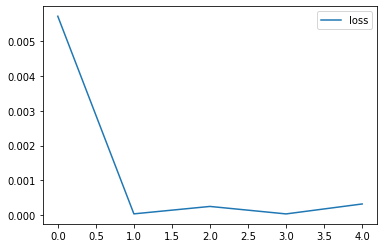

In [ ]:
losses.plot()

In [ ]:
# Getting the last 50 points of the eval batch, to predict the next 50 points, which is the test data
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.94192934]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
# Essentially this piece of code predicts 1 time step into the future,
# then discards the first value of the array, then appends the prediction to the end of the array
# rinse and repeat 50 times, to generate 50 time steps into the future, 
# 50 predictions into the future stored inside test_predictions array

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.94192934], dtype=float32),
 array([0.9584013], dtype=float32),
 array([0.967671], dtype=float32),
 array([0.97189945], dtype=float32),
 array([0.9694681], dtype=float32),
 array([0.9633376], dtype=float32),
 array([0.9522154], dtype=float32),
 array([0.93623334], dtype=float32),
 array([0.9148534], dtype=float32),
 array([0.8903269], dtype=float32),
 array([0.8627375], dtype=float32),
 array([0.83097035], dtype=float32),
 array([0.79626477], dtype=float32),
 array([0.75915784], dtype=float32),
 array([0.7202443], dtype=float32),
 array([0.6785799], dtype=float32),
 array([0.6350777], dtype=float32),
 array([0.59006554], dtype=float32),
 array([0.54419434], dtype=float32),
 array([0.49700937], dtype=float32),
 array([0.4489185], dtype=float32),
 array([0.40058908], dtype=float32),
 array([0.35244724], dtype=float32),
 array([0.30439368], dtype=float32),
 array([0.25658256], dtype=float32),
 array([0.21010639], dtype=float32),
 array([0.16517715], dtype=float32),
 array([0.1220

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


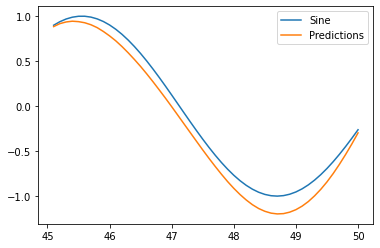

In [ ]:
test.plot()

# Implementing Early Stopping & LSTMs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
scaled_test.shape

(50, 1)

In [ ]:
length = 49 # We change the length to 49 now, cuz the test data has 50 datapoints, so if we keep length to 50 theres nth to predict
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(generator, epochs=20, validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 9s 11ms/step - loss: 0.0162 - val_loss: 2.4984e-04
Epoch 2/20
402/402 [==============================] - 4s 9ms/step - loss: 1.7301e-04 - val_loss: 1.0452e-04
Epoch 3/20
402/402 [==============================] - 4s 9ms/step - loss: 8.8003e-04 - val_loss: 1.3303e-04
Epoch 4/20
402/402 [==============================] - 4s 9ms/step - loss: 6.1756e-04 - val_loss: 3.7037e-05
Epoch 5/20
402/402 [==============================] - 4s 9ms/step - loss: 6.5544e-05 - val_loss: 1.9987e-07
Epoch 6/20
402/402 [==============================] - 4s 9ms/step - loss: 5.1744e-05 - val_loss: 1.8412e-08
Epoch 7/20
402/402 [==============================] - 4s 9ms/step - loss: 2.6777e-05 - val_loss: 2.2942e-05
Epoch 8/20
402/402 [==============================] - 4s 9ms/step - loss: 4.1649e-05 - val_loss: 1.8570e-05


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


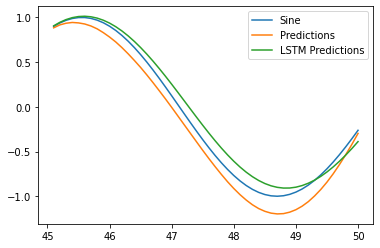

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot()

# Forecasting on the full dataframe without validation split, 
In the previous part we shown that our model is fine, so we use the same model structure on the full dataframe.

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 4s 9ms/step - loss: 1.0326e-04
Epoch 2/6
452/452 [==============================] - 4s 9ms/step - loss: 1.1372e-04
Epoch 3/6
452/452 [==============================] - 4s 9ms/step - loss: 2.4515e-04
Epoch 4/6
452/452 [==============================] - 4s 9ms/step - loss: 2.6466e-05
Epoch 5/6
452/452 [==============================] - 4s 9ms/step - loss: 2.4514e-06
Epoch 6/6
452/452 [==============================] - 4s 9ms/step - loss: 1.4091e-04


In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[-0.17339981],
       [-0.07647008],
       [ 0.02010721],
       [ 0.11528624],
       [ 0.20802901],
       [ 0.2973151 ],
       [ 0.38215746],
       [ 0.46161792],
       [ 0.53482089],
       [ 0.60096459],
       [ 0.65933459],
       [ 0.70931197],
       [ 0.75038294],
       [ 0.78214528],
       [ 0.8043104 ],
       [ 0.81670879],
       [ 0.81928476],
       [ 0.8120959 ],
       [ 0.79530767],
       [ 0.76918662],
       [ 0.73409467],
       [ 0.69048063],
       [ 0.63887332],
       [ 0.5798764 ],
       [ 0.51415971]])

In [ ]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [ ]:
len(forecast_index)

25

In [ ]:
len(forecast)

25

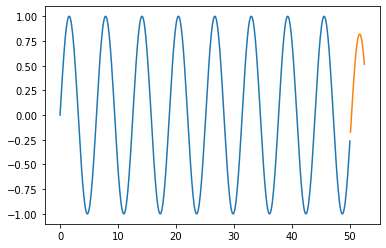

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

In [ ]:
len(df)